## Retail Store Sales Forecasting with Neural Networks -  Convolutional Neural Network
## By Yasaman Ensafi - 500913843
### Ryerson Data Science and Analytics (MSc)
#### 2019

## Import libraries

In [370]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from pylab import rcParams
import itertools
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from pandas import datetime
from pandas import DataFrame
from pandas import concat
from pandas import Series

## Load Dataset

In [371]:
data= pd.read_excel('Sample_Superstore.xls')

## Edit columns names

In [372]:
# Lower case column names
data.columns = map(str.lower, data.columns)

#Replace spaces with '_'
data.columns = data.columns.str.replace(" ", "_")
data.columns = data.columns.str.replace("-", "_")
data.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

## Separate dataframe of each category

In [373]:
furniture=data.loc[data['category'] == 'Furniture']

technology=data.loc[data['category'] == 'Technology']
office=data.loc[data['category'] == 'Office Supplies']

## Aggregating sales by date

In [374]:
furniture= furniture.groupby('order_date')['sales'].sum().reset_index()

technology= technology.groupby('order_date')['sales'].sum().reset_index()
office= office.groupby('order_date')['sales'].sum().reset_index()

In [375]:
#Set index 
furniture = furniture.set_index('order_date')

technology = technology.set_index('order_date')
office = office.set_index('order_date')

In [376]:
#furniture['sales']

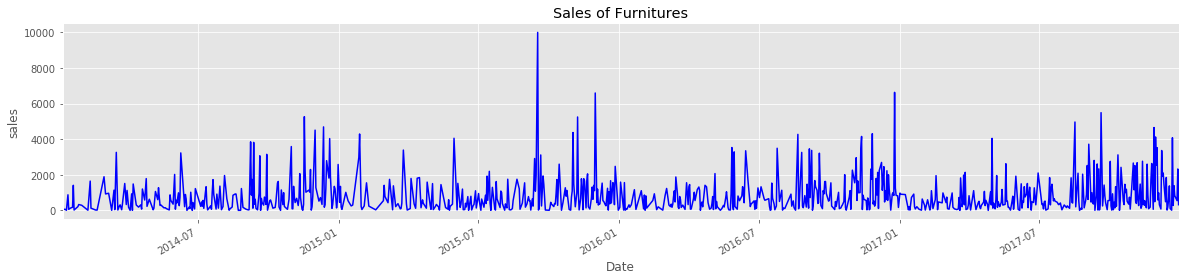

In [377]:
ax= furniture['sales'].plot(color='blue',figsize=(20,4))
ax.set_xlabel("Date")
ax.set_ylabel('sales')
ax.set_title("Sales of Furnitures")
plt.show()

In [378]:
# Using averages daily sales value - set start of the month as index
df = furniture['sales'].resample('MS').mean()
#df= avg_furniture_sales
#avg_technology_sales = technology_sales['sales'].resample('MS').mean()
#avg_office_sales = office_sales['sales'].resample('MS').mean()

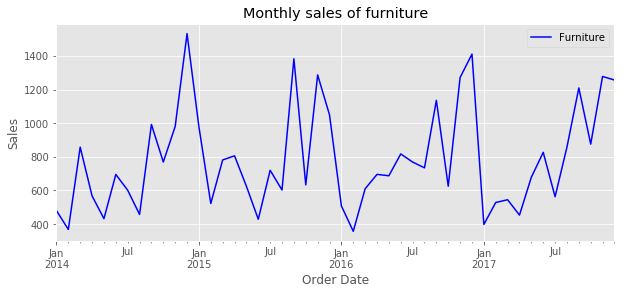

In [379]:
df.plot(figsize=(10, 4),color='blue',label = 'Furniture')

#avg_technology_sales.plot(figsize=(10, 4),color='red',label = 'Technology')

#avg_office_sales.plot(figsize=(10, 4),color='green',label = 'Office Supplies')
plt.xlabel("Order Date")
plt.ylabel('Sales')
plt.title("Monthly sales of furniture")
plt.legend()
plt.show()

In [380]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM

import warnings
warnings.filterwarnings("ignore")

In [381]:
train, test = np.array(df[:-12]), np.array(df[-12:])
train= train.reshape(-1,1)
test= test.reshape(-1,1)

In [382]:
#Scale train and test data to [-1, 1]
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [383]:
dfcnn= np.array(df)
dfcnn= dfcnn.reshape(-1,1)
scaler = MinMaxScaler()
ts = scaler.fit_transform(dfcnn)

In [384]:
timestep = 12

X= []
Y=[]

raw_data=ts

for i in range(len(raw_data)- (timestep)):
    X.append(raw_data[i:i+timestep])
    Y.append(raw_data[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 24
Xtrain = X[:k,:,:]  
Ytrain = Y[:k] 

In [385]:
Ytrain

array([[0.52870878],
       [0.14082284],
       [0.36103226],
       [0.3819493 ],
       [0.22811092],
       [0.06099659],
       [0.30868536],
       [0.20889694],
       [0.87280601],
       [0.23490289],
       [0.79105777],
       [0.58913514],
       [0.12873126],
       [0.        ],
       [0.21499156],
       [0.28798386],
       [0.28108602],
       [0.39138227],
       [0.35039783],
       [0.32110759],
       [0.66280856],
       [0.22800523],
       [0.77799345],
       [0.89656678]])

In [386]:
Xtest = X[24:,:,:]  
Ytest= Y[24:] 
#12 tup

In [387]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


from keras.models import Sequential
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D



from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import os

In [388]:
from tensorflow import set_random_seed
from numpy.random import seed
set_random_seed(1)
seed(1)

model = Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(12, 1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=200, verbose=1)

Epoch 1/200
24/24 [==============================] - 2s 69ms/step - loss: 0.2327
Epoch 2/200
24/24 [==============================] - 0s 355us/step - loss: 0.1793
Epoch 3/200
24/24 [==============================] - 0s 622us/step - loss: 0.1320
Epoch 4/200
24/24 [==============================] - 0s 1ms/step - loss: 0.0955
Epoch 5/200
24/24 [==============================] - 0s 626us/step - loss: 0.0761
Epoch 6/200
24/24 [==============================] - 0s 656us/step - loss: 0.0863
Epoch 7/200
24/24 [==============================] - 0s 831us/step - loss: 0.0976
Epoch 8/200
24/24 [==============================] - 0s 549us/step - loss: 0.0887
Epoch 9/200
24/24 [==============================] - 0s 535us/step - loss: 0.0751
Epoch 10/200
24/24 [==============================] - 0s 349us/step - loss: 0.0679
Epoch 11/200
24/24 [==============================] - 0s 542us/step - loss: 0.0671
Epoch 12/200
24/24 [==============================] - 0s 336us/step - loss: 0.0692
Epoch 13/200
24/

Epoch 99/200
24/24 [==============================] - 0s 367us/step - loss: 1.1664e-05
Epoch 100/200
24/24 [==============================] - 0s 460us/step - loss: 9.7257e-06
Epoch 101/200
24/24 [==============================] - 0s 502us/step - loss: 8.5784e-06
Epoch 102/200
24/24 [==============================] - 0s 501us/step - loss: 7.6820e-06
Epoch 103/200
24/24 [==============================] - 0s 453us/step - loss: 6.8521e-06
Epoch 104/200
24/24 [==============================] - 0s 461us/step - loss: 6.1057e-06
Epoch 105/200
24/24 [==============================] - 0s 472us/step - loss: 5.3852e-06
Epoch 106/200
24/24 [==============================] - 0s 472us/step - loss: 4.6584e-06
Epoch 107/200
24/24 [==============================] - 0s 479us/step - loss: 3.9394e-06
Epoch 108/200
24/24 [==============================] - 0s 495us/step - loss: 3.4533e-06
Epoch 109/200
24/24 [==============================] - 0s 441us/step - loss: 3.2363e-06
Epoch 110/200
24/24 [============

24/24 [==============================] - 0s 388us/step - loss: 1.0178e-06
Epoch 193/200
24/24 [==============================] - 0s 379us/step - loss: 1.0823e-07
Epoch 194/200
24/24 [==============================] - 0s 466us/step - loss: 2.2456e-06
Epoch 195/200
24/24 [==============================] - 0s 432us/step - loss: 5.9056e-06
Epoch 196/200
24/24 [==============================] - 0s 385us/step - loss: 9.5002e-06
Epoch 197/200
24/24 [==============================] - 0s 400us/step - loss: 1.1762e-05
Epoch 198/200
24/24 [==============================] - 0s 452us/step - loss: 1.2100e-05
Epoch 199/200
24/24 [==============================] - 0s 474us/step - loss: 1.0473e-05
Epoch 200/200
24/24 [==============================] - 0s 497us/step - loss: 7.5816e-06


In [389]:
preds = model.predict(Xtest)
preds=np.array(preds)
preds=preds.reshape(-1,1)
preds = scaler.inverse_transform(preds)


Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds)

39349.89624099153

In [390]:
def performance(y_true, y_pred): 
    #y_true, y_pred = np.array(y_true), np.array(y_pred)
    mse = ((y_pred - y_true) ** 2).mean()
    mape= np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return( print(' The MSE of forecasts is {}'.format(round(mse, 2))+
                  '\n The RMSE of forecasts is {}'.format(round(np.sqrt(mse), 2))+
                  '\n The MAPE of forecasts is {}'.format(round(mape, 2))))
performance(Ytest,preds)

 The MSE of forecasts is 39349.9
 The RMSE of forecasts is 198.37
 The MAPE of forecasts is 23.35


In [391]:
preds.shape

(12, 1)

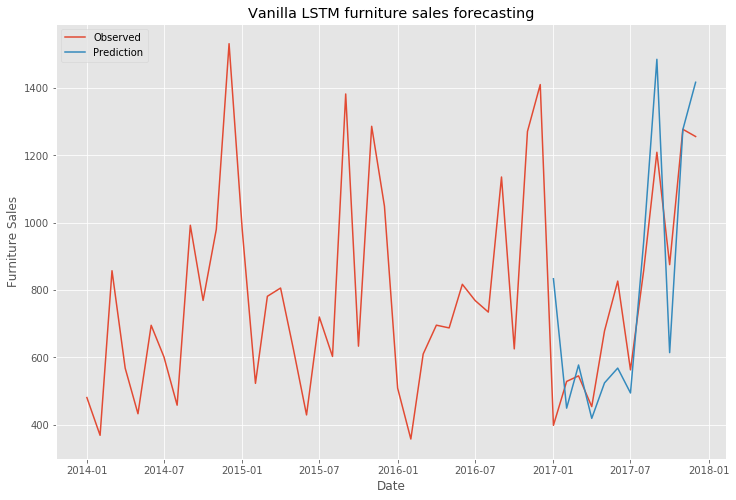

In [392]:
# report performance
rcParams['figure.figsize'] = 12, 8
# line plot of observed vs predicted
plt.plot(df.index,df,label="Observed")
plt.plot(df[36:].index,preds,label="Prediction")
plt.title('Vanilla LSTM furniture sales forecasting')
plt.xlabel('Date')
plt.ylabel('Furniture Sales')
plt.legend()
plt.show()